<a href="https://colab.research.google.com/github/gabriellarumapea/Hands-On-Pemrosesan-Audio/blob/main/Tugas_2/TugasMultimedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **AUDIO PROCESSING**



##**Soal 1 - Rekaman dan Analisis Suara Multi-Level**

Pada soal 1 ini, dilakukan perekaman suara yang kemudian akan di analisis ke dalam sebuah kode yang mana nantinya mengubah audio digital menjadi sebuah array numerik yang dapat diolah menggunakan library librosa.



---


**Visualisasi Waveform**

---



Visualisasi ini menggambarkan amplitudo atau tingkat volume suara seiring berjalannya waktu. Sesuai dengan rekaman yang dibuat, waveform akan menunjukkan level amplitudo yang sangat rendah pada lima detik pertama saat suara berbisik, kemudian meningkat ke level medium pada saat suara normal, dan menjadi sangat tinggi pada segmen suara keras dan berteriak. Segmen suara cempreng kemungkinan akan menunjukkan bentuk gelombang yang lebih tidak teratur dengan penekanan pada frekuensi yang lebih tinggi.


---
**Visualisasi Spektogram**


---
Sedangkan untuk visualisasi ini memberikan gambaran lebih mendalam dengan memetakan distribusi frekuensi (dari nada rendah ke tinggi) dari waktu ke waktu, di mana warna yang lebih terang menandakan energi suara yang lebih besar pada frekuensi tersebut. Untuk rekaman ini, spektogram akan menampilkan energi frekuensi yang lemah dan tersebar saat berbisik. Pada suara normal dan keras, akan terlihat jelas frekuensi dasar vokal beserta harmoniknya. Saat suara dibuat cempreng, energi akan terlihat terkonsentrasi pada pita frekuensi yang lebih tinggi. Puncaknya, pada saat berteriak, spektogram akan menunjukkan energi yang sangat intens dan tersebar luas di hampir seluruh rentang frekuensi, menggambarkan kekayaan dan kekuatan sinyal suara pada momen tersebut.



---
**Proses Resampling**


---
Proses ini untuk mengubah sample rate asli dari rekaman ke dua nilai baru, yaitu 8000 Hz dan 44100 Hz. Resampling ke 8000 Hz (downsampling) secara efektif mengurangi jumlah informasi digital dalam audio, yang akan menghasilkan kualitas suara yang terdengar lebih teredam atau seperti suara telepon karena detail frekuensi tinggi (di atas 4000 Hz) akan hilang. Sebaliknya, resampling ke 44100 Hz (upsampling) bertujuan untuk mencocokkan standar kualitas audio CD. Jika rekaman asli sudah memiliki sample rate yang tinggi, mungkin tidak akan ada peningkatan kualitas yang terdengar signifikan, namun jika rekaman asli di bawah standar ini, proses ini akan menambahkan sampel data baru melalui interpolasi. Penting untuk dicatat bahwa meskipun kualitas suaranya berubah, proses resampling ini tidak mengubah total durasi asli dari rekaman suara yang berdurasi 25 detik tersebut.







Membuat visualisasi waveform dan spektogram...


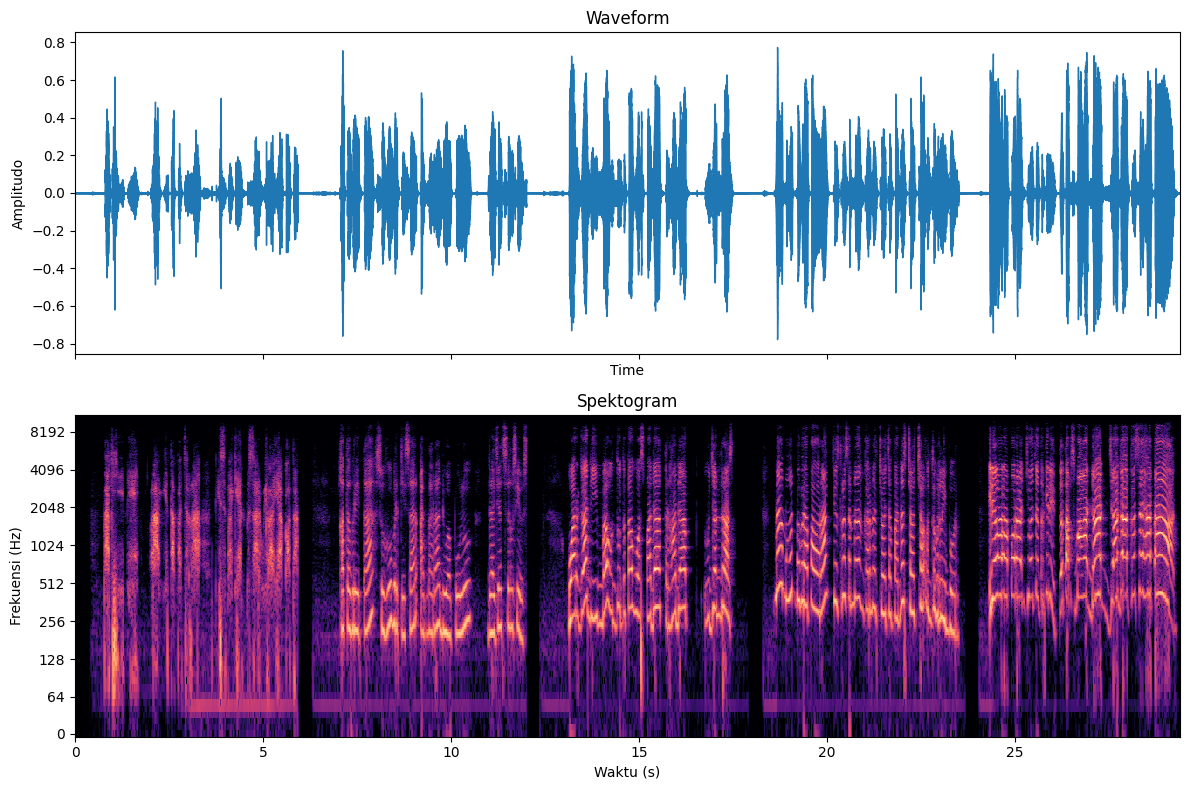


Melakukan resampling audio...
Audio telah di-resample ke 8000 Hz dan disimpan sebagai 'soal1_resampled_8k.wav'
Audio telah di-resample ke 44100 Hz dan disimpan sebagai 'soal1_resampled_44k.wav'


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

# Path ke file audio Anda
file_path = '/content/drive/MyDrive/multimedia/rekaman.wav'

# Muat file audio
y, sr = librosa.load(file_path)

# --- Visualisasi Waveform dan Spektogram ---
print("Membuat visualisasi waveform dan spektogram...")
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))

# Visualisasi Waveform
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Waveform')
ax[0].set_ylabel('Amplitudo')

# Visualisasi Spektogram
D = librosa.stft(y)
DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log', ax=ax[1])
ax[1].set(title='Spektogram')
ax[1].set_ylabel('Frekuensi (Hz)')
ax[1].set_xlabel('Waktu (s)')

fig.tight_layout()
plt.show()

# --- Resampling Audio ---
print("\nMelakukan resampling audio...")
# Resampling ke sample rate yang lebih rendah (misal: 8000 Hz)
y_resampled_8k = librosa.resample(y, orig_sr=sr, target_sr=8000)
sf.write('/content/drive/MyDrive/multimedia/soal1_resampled_8k.wav', y_resampled_8k, 8000)
print("Audio telah di-resample ke 8000 Hz dan disimpan sebagai 'soal1_resampled_8k.wav'")

# Resampling ke sample rate yang lebih tinggi (misal: 44100 Hz)
y_resampled_44k = librosa.resample(y, orig_sr=sr, target_sr=44100)
sf.write('/content/drive/MyDrive/multimedia/soal1_resampled_44k.wav', y_resampled_44k, 44100)
print("Audio telah di-resample ke 44100 Hz dan disimpan sebagai 'soal1_resampled_44k.wav'")

## **Soal 2 - Noise Reduction dengan Filtering**

Pada soal 2 ini, tujuannya adalah untuk membersihkan rekaman suara (rekaman2.wav) yang direkam di lingkungan bising, seperti di dekat kipas angin atau AC. Kode yang dijalankan akan menerapkan berbagai jenis filter untuk menghilangkan noise yang mengganggu dan meningkatkan kejelasan vokal.


---


**Analisis Jenis Noise dan Eksperimen Filtering**


---


Jenis noise yang muncul dari sumber seperti ini biasanya bersifat ganda: pertama, ada dengungan frekuensi rendah (low-frequency hum) dari motor mesin, dan kedua, ada desisan frekuensi tinggi (high-frequency hiss) dari hembusan udara. Untuk mengatasi ini, dilakukan eksperimen dengan tiga jenis filter: high-pass filter (cutoff 500, 1000, 2000 Hz) untuk menghilangkan dengungan, low-pass filter pada frekuensi yang sama untuk meredam desisan, dan band-pass filter untuk mengisolasi rentang frekuensi inti vokal manusia ([300, 3400] Hz). Setiap hasil disimpan dan divisualisasikan dalam spektogram untuk analisis perbandingan.



---


**Evaluasi Hasil dan Filter Terbaik**


---


Dari hasil eksperimen, filter yang paling efektif secara komprehensif adalah band-pass filter. Sementara high-pass filter hanya berhasil pada dengungan dan low-pass filter hanya pada desisan (sambil membuat vokal teredam), band-pass filter menjadi solusi unggul karena ia melakukan keduanya sekaligus: memotong dengungan di bawah 300 Hz dan meredam desisan di atas 3400 Hz. Oleh karena itu, nilai cutoff yang memberikan hasil terbaik adalah rentang [300, 3400] Hz, karena secara presisi mempertahankan frekuensi yang paling penting untuk kejelasan vokal.


---


**Peningkatan Kualitas Suara**


---


Setelah melalui proses filtering dengan band-pass filter, kualitas suara dan kejelasan ucapan meningkat secara signifikan. Suara vokal menjadi lebih jernih, fokus, dan mudah dipahami karena tidak lagi bersaing dengan noise di latar belakang. Pada spektogram hasil, akan terlihat jelas bahwa energi di pita frekuensi sangat rendah dan sangat tinggi telah dihilangkan, menyisakan pita frekuensi di bagian tengah yang berisi suara vokal yang bersih, membuktikan keberhasilan proses noise reduction ini.

Menerapkan High-pass dan Low-pass filter...
-> Selesai, 6 file .wav telah disimpan.

Menerapkan Band-pass filter...
-> Selesai, 1 file band-pass .wav telah disimpan.

Membuat visualisasi perbandingan semua spektogram...


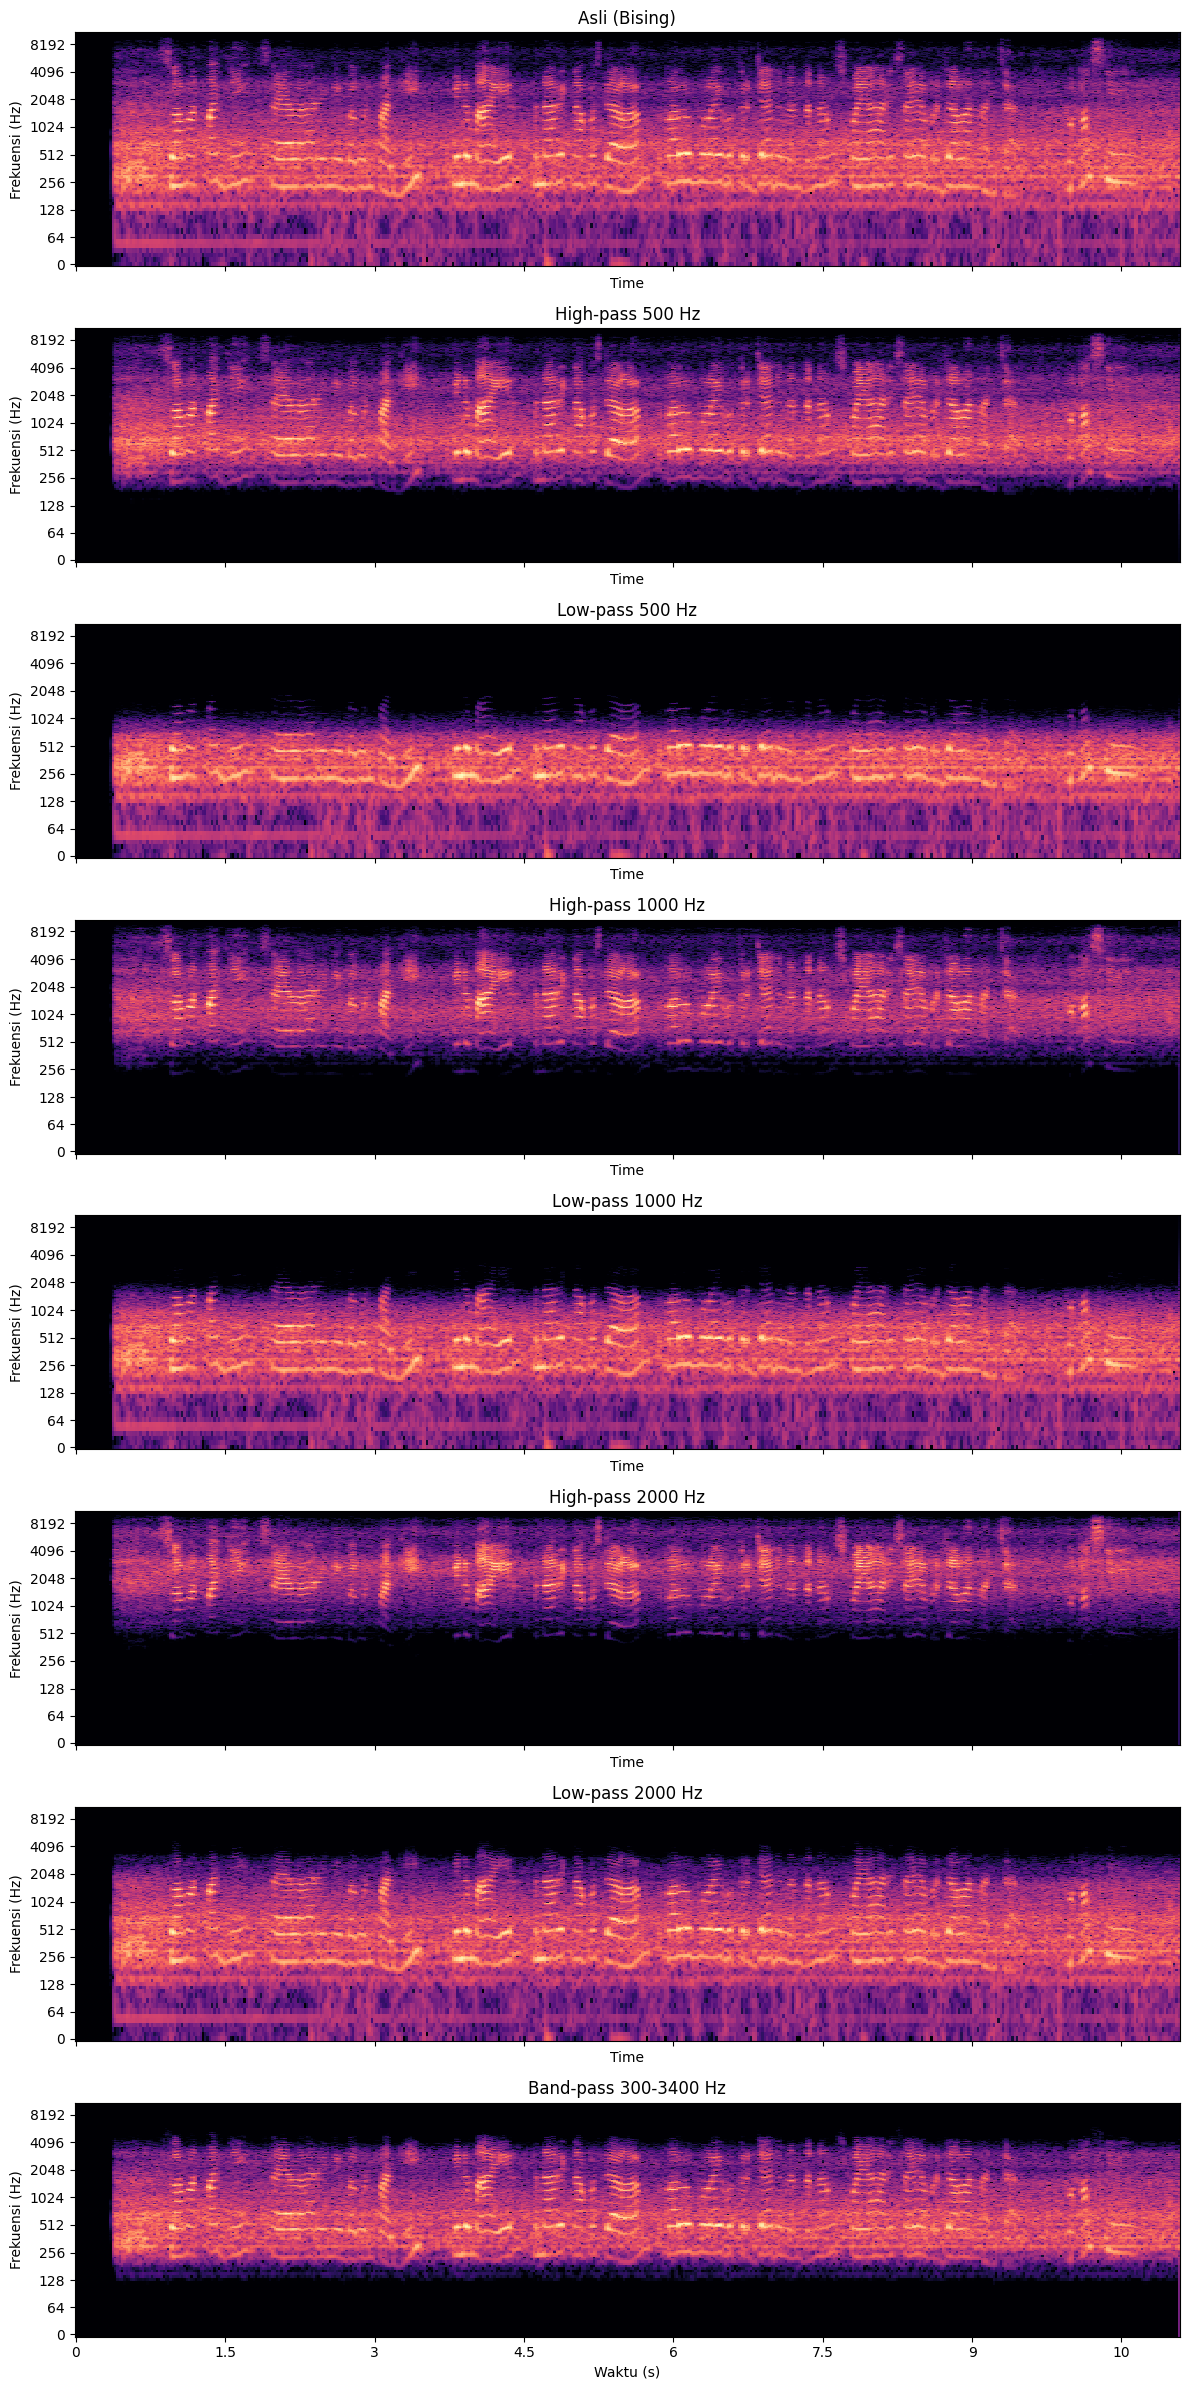

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from scipy.signal import butter, lfilter

# --- FUNGSI FILTER ---
def apply_filter(data, sr, cutoff, order, filter_type):
    # untuk menangani normalisasi frekuensi secara otomatis.
    b, a = butter(order, cutoff, btype=filter_type, fs=sr, analog=False)
    y = lfilter(b, a, data)
    return y

# Path ke file audio Anda
file_path_noisy = '/content/drive/MyDrive/multimedia/rekaman2.wav'

# Muat file audio
y_noisy, sr_noisy = librosa.load(file_path_noisy)

# Dictionary untuk menyimpan semua hasil filter
filtered_results = {}

# --- EKSPERIMEN DENGAN HIGH-PASS DAN LOW-PASS FILTER ---
print("Menerapkan High-pass dan Low-pass filter...")
cutoff_freqs = [500, 1000, 2000] # Frekuensi yang akan diuji

for cf in cutoff_freqs:
    # High-pass filter
    y_hp = apply_filter(y_noisy, sr_noisy, cf, 5, 'high')
    title_hp = f'High-pass {cf} Hz'
    filtered_results[title_hp] = y_hp
    sf.write(f'/content/drive/MyDrive/multimedia/soal2_highpass_{cf}Hz.wav', y_hp, sr_noisy)

    # Low-pass filter
    y_lp = apply_filter(y_noisy, sr_noisy, cf, 5, 'low')
    title_lp = f'Low-pass {cf} Hz'
    filtered_results[title_lp] = y_lp
    sf.write(f'/content/drive/MyDrive/multimedia/soal2_lowpass_{cf}Hz.wav', y_lp, sr_noisy)

print(f"-> Selesai, {len(cutoff_freqs) * 2} file .wav telah disimpan.")

# --- EKSPERIMEN DENGAN BAND-PASS FILTER ---
print("\nMenerapkan Band-pass filter...")
vocal_range = [300, 3400]
y_bp = apply_filter(y_noisy, sr_noisy, vocal_range, 5, 'band')
title_bp = f'Band-pass {vocal_range[0]}-{vocal_range[1]} Hz'
filtered_results[title_bp] = y_bp
sf.write(f'/content/drive/MyDrive/multimedia/soal2_bandpass_{vocal_range[0]}-{vocal_range[1]}Hz.wav', y_bp, sr_noisy)
print(f"-> Selesai, 1 file band-pass .wav telah disimpan.")


# --- VISUALISASI PERBANDINGAN SEMUA FILTER ---
print("\nMembuat visualisasi perbandingan semua spektogram...")

# Jumlah total plot = 1 (asli) + jumlah filter yang diterapkan
num_plots = len(filtered_results) + 1
fig, ax = plt.subplots(nrows=num_plots, ncols=1, sharex=True, sharey=True, figsize=(12, num_plots * 3))

# Plot Spektogram Asli
D_noisy = librosa.stft(y_noisy)
DB_noisy = librosa.amplitude_to_db(np.abs(D_noisy), ref=np.max)
librosa.display.specshow(DB_noisy, sr=sr_noisy, x_axis='time', y_axis='log', ax=ax[0])
ax[0].set_title('Asli (Bising)')
ax[0].set_ylabel('Frekuensi (Hz)')

# Plot Spektogram Hasil Filter
i = 1
for title, data in filtered_results.items():
    D_filtered = librosa.stft(data)
    DB_filtered = librosa.amplitude_to_db(np.abs(D_filtered), ref=np.max)
    librosa.display.specshow(DB_filtered, sr=sr_noisy, x_axis='time', y_axis='log', ax=ax[i])
    ax[i].set_title(title)
    ax[i].set_ylabel('Frekuensi (Hz)')
    i += 1

ax[-1].set_xlabel('Waktu (s)')
fig.tight_layout()
plt.show()

## **Soal 3 - Pitch Shifting dan Audio Manipulation**

Pada soal 3 ini, rekaman suara dari Soal 1 akan dimanipulasi untuk mengubah tinggi nadanya (pitch). Tujuannya adalah untuk menciptakan efek suara "chipmunk" dengan menaikkan pitch secara signifikan, kemudian menggabungkan dua versi suara bernada tinggi yang berbeda ke dalam satu file audio.


---


**Proses Pitch Shifting dan Parameter**


---


Pitch shifting adalah proses mengubah tinggi nada sebuah audio tanpa mengubah durasinya. Dalam kode ini, proses tersebut dilakukan menggunakan fungsi librosa.effects.pitch_shift. Parameter yang digunakan adalah n_steps, yang menentukan berapa banyak seminada (semitone) nada akan dinaikkan. Sesuai instruksi, dilakukan dua kali proses pitch shifting: pertama dengan n_steps=7 untuk menaikkan nada sebanyak 7 seminada, dan kedua dengan n_steps=12 untuk menaikkan nada sebanyak satu oktaf penuh, menciptakan dua variasi suara chipmunk yang berbeda.


---


**Analisis Visual Sebelum dan Sesudah**


---


Perbedaan antara suara asli dan suara yang telah dimodifikasi sangat jelas terlihat pada visualisasi spektogram. Pada spektogram suara asli, energi frekuensi vokal dan harmoniknya terkonsentrasi di pita frekuensi yang lebih rendah. Setelah proses pitch shifting, seluruh konten frekuensi ini secara visual bergeser ke atas ke pita frekuensi yang lebih tinggi. Semakin tinggi nilai n_steps, semakin jauh pergeseran ke atas yang terjadi. Hal ini secara visual merepresentasikan perubahan nada dari rendah menjadi sangat tinggi.


---


**Pengaruh pada Kualitas Suara dan Penggabungan Audio**


---


Perubahan pitch secara drastis ke atas memengaruhi kualitas dan kejelasan suara dengan membuatnya terdengar lebih tipis, cepat, dan tidak alami, sesuai dengan target efek suara chipmunk. Meskipun format ucapan masih bisa dikenali, karakter asli suara akan hilang sepenuhnya. Langkah terakhir adalah menggabungkan kedua rekaman yang telah di-pitch shift (+7 dan +12) menjadi satu file audio. Proses ini dilakukan dengan menumpuk (overlay) kedua trek suara, sehingga keduanya diputar secara bersamaan, menciptakan efek suara yang lebih kaya dan berlapis.

File '/content/drive/MyDrive/multimedia/rekaman.wav' berhasil dimuat.
Menerapkan pitch shifting...
-> Audio dengan pitch +7 telah disimpan.
-> Audio dengan pitch +12 telah disimpan.
Membuat visualisasi perbandingan spektogram...


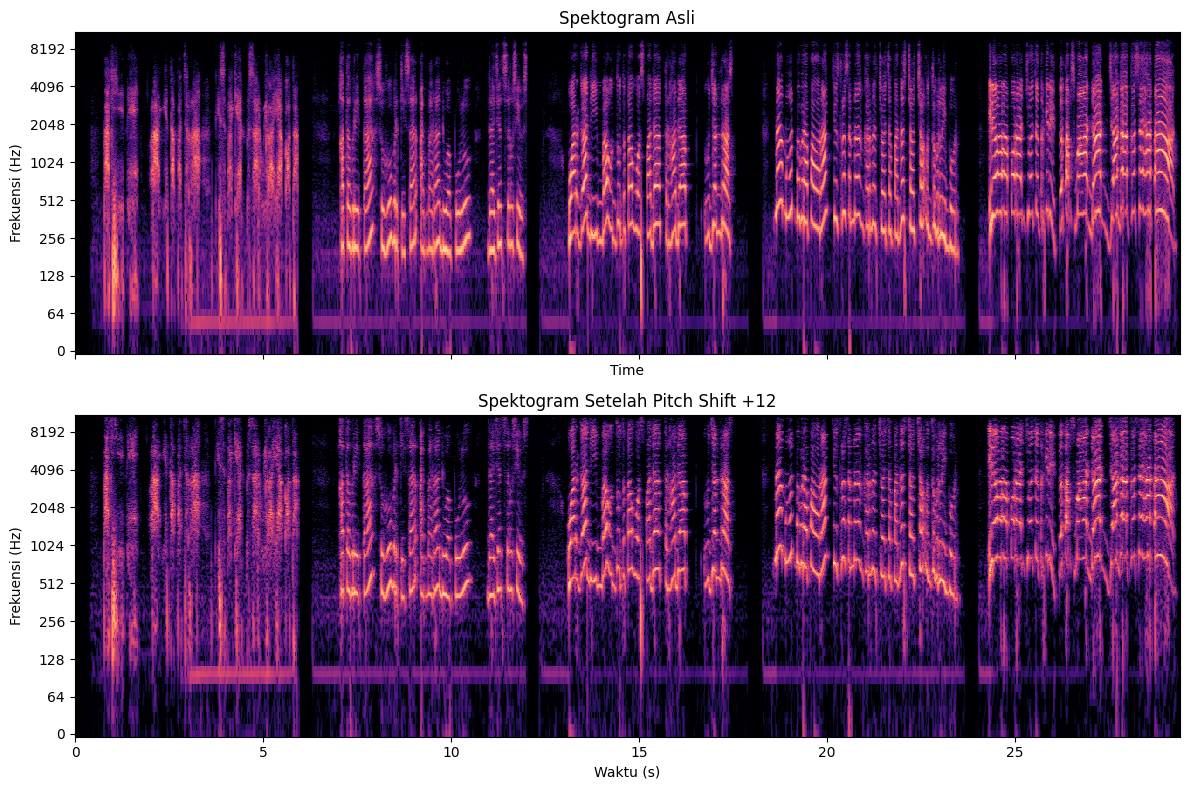


Menggabungkan dua file audio hasil pitch shift...
File gabungan 'soal3_gabungan.wav' telah disimpan.


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from pydub import AudioSegment

# Muat file audio asli dari Soal 1
try:
    file_path_soal1 = '/content/drive/MyDrive/multimedia/rekaman.wav'
    y, sr = librosa.load(file_path_soal1)
    print(f"File '{file_path_soal1}' berhasil dimuat.")
except FileNotFoundError:
    print(f"ERROR: File '{file_path_soal1}' tidak ditemukan. Pastikan file rekaman dari Soal 1 ada.")
    exit()

# --- Proses Pitch Shifting ---
# Terapkan pitch shifting +7 dan +12 semitone sesuai instruksi
print("Menerapkan pitch shifting...")
y_pitch7 = librosa.effects.pitch_shift(y, sr=sr, n_steps=7)
sf.write('/content/drive/MyDrive/multimedia/soal3_pitch_plus7.wav', y_pitch7, sr)
print("-> Audio dengan pitch +7 telah disimpan.")

y_pitch12 = librosa.effects.pitch_shift(y, sr=sr, n_steps=12)
sf.write('/content/drive/MyDrive/multimedia/soal3_pitch_plus12.wav', y_pitch12, sr)
print("-> Audio dengan pitch +12 telah disimpan.")


# --- Visualisasi Perbandingan ---
print("Membuat visualisasi perbandingan spektogram...")
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(12, 8))

# Spektogram Asli
D_orig = librosa.stft(y)
DB_orig = librosa.amplitude_to_db(np.abs(D_orig), ref=np.max)
librosa.display.specshow(DB_orig, sr=sr, x_axis='time', y_axis='log', ax=ax[0])
ax[0].set_title('Spektogram Asli')
ax[0].set_ylabel('Frekuensi (Hz)')

# Spektogram Setelah Pitch Shift +12
D_pitch12_spec = librosa.stft(y_pitch12)
DB_pitch12_spec = librosa.amplitude_to_db(np.abs(D_pitch12_spec), ref=np.max)
librosa.display.specshow(DB_pitch12_spec, sr=sr, x_axis='time', y_axis='log', ax=ax[1])
ax[1].set_title('Spektogram Setelah Pitch Shift +12')
ax[1].set_ylabel('Frekuensi (Hz)')
ax[1].set_xlabel('Waktu (s)')

fig.tight_layout()
plt.show()


# --- Menggabungkan Dua Audio Hasil Pitch Shift ---
print("\nMenggabungkan dua file audio hasil pitch shift...")
sound1 = AudioSegment.from_wav('soal3_pitch_plus7.wav')
sound2 = AudioSegment.from_wav('soal3_pitch_plus12.wav')

# Gabungkan dengan menumpuk (overlay) keduanya
combined_sound = sound1.overlay(sound2)

# Simpan hasilnya
combined_sound.export('/content/drive/MyDrive/multimedia/soal3_gabungan.wav', format='wav')
print("File gabungan 'soal3_gabungan.wav' telah disimpan.")


## **Soal 4 - Audio Processing Chain**

Pada soal 4 ini, file audio soal3_gabungan.wav yang merupakan hasil manipulasi pitch shifting akan diproses lebih lanjut melalui serangkaian tahapan profesional yang disebut audio processing chain. Tujuannya adalah untuk membersihkan, menyeimbangkan dinamika, dan mengoptimalkan tingkat kenyaringan (loudness) audio agar sesuai dengan standar modern.


---


**Tahapan Proses dan Visualisasi**

---



Proses dimulai dengan menerapkan Equalizer berupa high-pass filter untuk membuang frekuensi rendah yang tidak perlu pada suara "chipmunk". Selanjutnya, Noise Gate dan Silence Trimming digunakan untuk memotong bagian-bagian hening di antara ucapan, membuat audio menjadi lebih padat dan bersih. Setelah itu, Compression diterapkan untuk mempersempit rentang dinamis, yaitu membuat bagian yang pelan lebih terdengar dan bagian yang keras tidak terlalu menonjol. Tahap akhir adalah Normalization, di mana kenyaringan audio diatur secara presisi ke target -16 LUFS (Loudness Units Full Scale), sebuah standar yang digunakan di banyak platform siaran dan streaming.


---


Analisis Perubahan Dinamika Suara

---



Perubahan dinamika suara sangat jelas terlihat saat membandingkan waveform sebelum dan sesudah diproses. Waveform awal menunjukkan rentang dinamis yang lebar, dengan puncak-puncak volume yang tinggi dan lembah-lembah yang sangat rendah. Setelah melalui kompresi dan normalisasi, waveform akhir terlihat jauh lebih "tebal" dan padat. Puncak-puncak yang tadinya sangat tinggi telah ditekan, dan bagian yang pelan telah diangkat, menghasilkan level volume keseluruhan yang jauh lebih konsisten dan stabil dari awal hingga akhir.


---


Normalisasi Peak vs. LUFS dan Kualitas Suara

---



Terdapat perbedaan fundamental antara normalisasi Peak dan LUFS. Normalisasi Peak hanya mengatur volume berdasarkan satu titik sampel paling keras, yang tidak mencerminkan bagaimana manusia merasakan kenyaringan. Sebaliknya, normalisasi LUFS mengukur kenyaringan rata-rata yang dirasakan (perceived loudness) dari waktu ke waktu, meniru cara kerja telinga manusia. Hasilnya, kualitas suara setelah optimisasi LUFS menjadi lebih seimbang, profesional, dan nyaman didengar. Kelebihannya adalah audio menjadi lebih jelas di lingkungan bising dan memiliki volume yang konsisten dengan konten profesional lainnya. Kekurangannya, jika diterapkan secara berlebihan, optimisasi ini dapat mengurangi nuansa dinamika alami dari rekaman asli.

File '/content/drive/MyDrive/multimedia/soal3_gabungan.wav' berhasil dimuat.
Membuat visualisasi audio SEBELUM diproses...


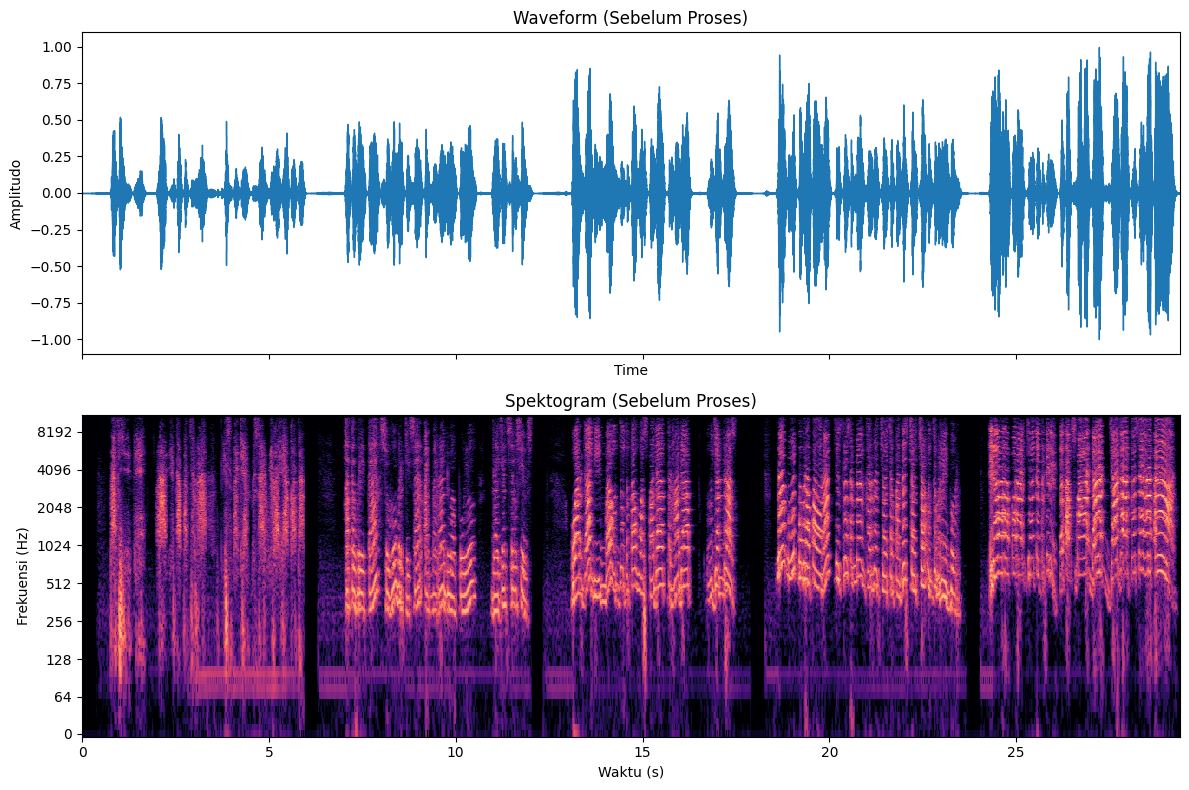


Memulai Audio Processing Chain...
-> (1/4) Equalizer (High-pass 200Hz) diterapkan.
-> (2/4) Noise Gate & Silence Trimming diterapkan.
-> (3/4) Kompresi diterapkan.
Loudness sebelum normalisasi: 67.72 LUFS
-> (4/4) Normalisasi ke target -16.0 LUFS diterapkan.

Proses selesai. File hasil disimpan sebagai '/content/drive/MyDrive/multimedia/soal4_processed.wav'
Membuat visualisasi audio SETELAH diproses...


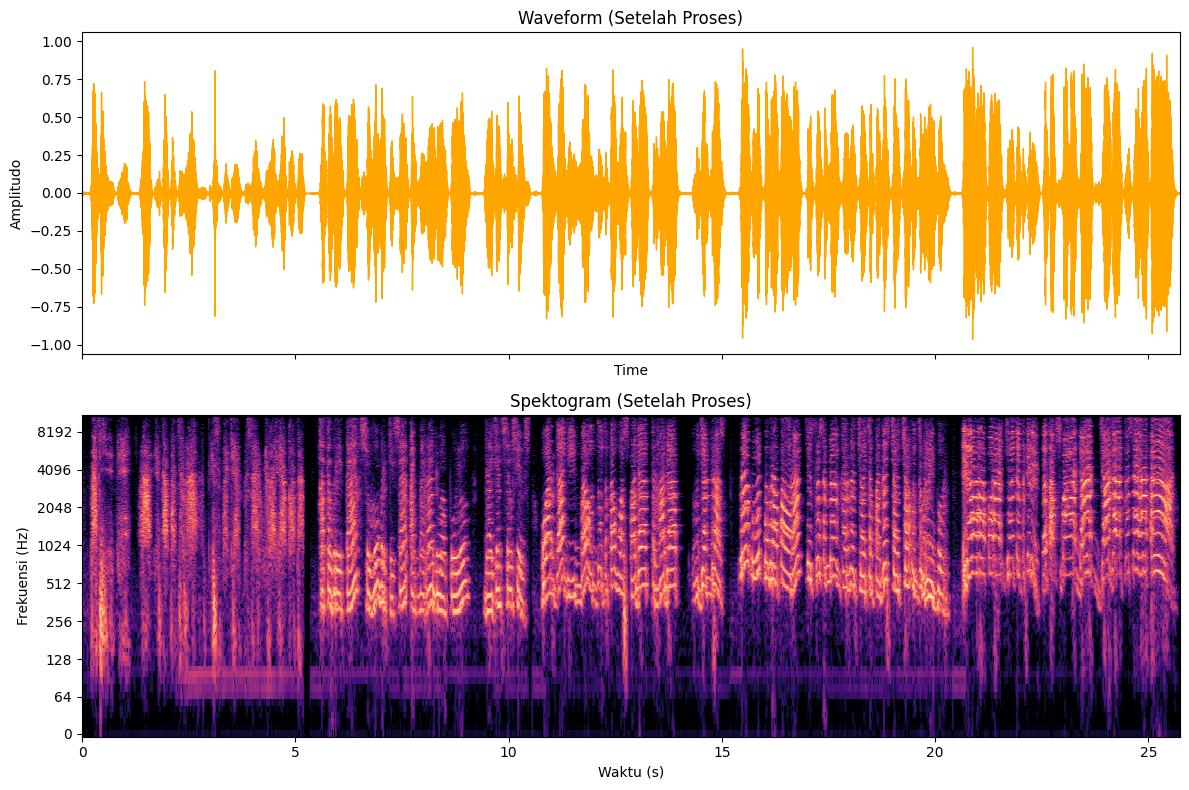

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from pydub import AudioSegment
from pydub.effects import high_pass_filter, compress_dynamic_range
from pydub.silence import split_on_silence
import pyloudnorm as pyln

# --- Muat File Audio ---
try:
    input_file = '/content/drive/MyDrive/multimedia/soal3_gabungan.wav'
    audio = AudioSegment.from_wav(input_file)
    print(f"File '{input_file}' berhasil dimuat.")
except FileNotFoundError:
    print(f"ERROR: File '{input_file}' tidak ditemukan. Pastikan Anda sudah menjalankan Soal 3.")
    exit()

# --- Visualisasi Audio SEBELUM Diproses ---
print("Membuat visualisasi audio SEBELUM diproses...")
y_before = np.array(audio.get_array_of_samples(), dtype=np.float32) / (1 << 15)
sr_before = audio.frame_rate

fig_before, ax_before = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))
librosa.display.waveshow(y_before, sr=sr_before, ax=ax_before[0])
ax_before[0].set_title('Waveform (Sebelum Proses)')
ax_before[0].set_ylabel('Amplitudo')
D_before = librosa.stft(y_before)
DB_before = librosa.amplitude_to_db(np.abs(D_before), ref=np.max)
librosa.display.specshow(DB_before, sr=sr_before, x_axis='time', y_axis='log', ax=ax_before[1])
ax_before[1].set_title('Spektogram (Sebelum Proses)')
ax_before[1].set_ylabel('Frekuensi (Hz)')
ax_before[1].set_xlabel('Waktu (s)')
fig_before.tight_layout()
plt.show()

# --- Audio Processing Chain ---
print("\nMemulai Audio Processing Chain...")

# a. Equalizer (EQ): Hilangkan frekuensi rendah yang tidak perlu
processed_audio = high_pass_filter(audio, cutoff=200)
print("-> (1/4) Equalizer (High-pass 200Hz) diterapkan.")

# b. Noise Gate & Silence Trimming: Memotong bagian hening
non_silent_chunks = split_on_silence(
    processed_audio,
    min_silence_len=500,
    silence_thresh=processed_audio.dBFS - 14,
    keep_silence=250
)
processed_audio = sum(non_silent_chunks) if non_silent_chunks else AudioSegment.empty()
print("-> (2/4) Noise Gate & Silence Trimming diterapkan.")

# c. Compression: Mengurangi rentang dinamis
processed_audio = compress_dynamic_range(processed_audio, threshold=-20.0, ratio=4.0)
print("-> (3/4) Kompresi diterapkan.")

# d. Normalization (LUFS): Mengatur kenyaringan ke target -16 LUFS
target_lufs = -16.0
data = np.array(processed_audio.get_array_of_samples(), dtype=np.float32)
rate = processed_audio.frame_rate

meter = pyln.Meter(rate)
loudness = meter.integrated_loudness(data)
print(f"Loudness sebelum normalisasi: {loudness:.2f} LUFS")

loudness_normalized_audio = pyln.normalize.loudness(data, loudness, target_lufs)
print(f"-> (4/4) Normalisasi ke target {target_lufs} LUFS diterapkan.")

# --- Simpan Hasil Akhir ---
output_file = '/content/drive/MyDrive/multimedia/soal4_processed.wav'
sf.write(output_file, loudness_normalized_audio, rate)
print(f"\nProses selesai. File hasil disimpan sebagai '{output_file}'")

# --- Visualisasi Audio SETELAH Diproses ---
print("Membuat visualisasi audio SETELAH diproses...")
y_after = loudness_normalized_audio
sr_after = rate

fig_after, ax_after = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))
librosa.display.waveshow(y_after, sr=sr_after, ax=ax_after[0], color='orange')
ax_after[0].set_title('Waveform (Setelah Proses)')
ax_after[0].set_ylabel('Amplitudo')
D_after = librosa.stft(y_after)
DB_after = librosa.amplitude_to_db(np.abs(D_after), ref=np.max)
librosa.display.specshow(DB_after, sr=sr_after, x_axis='time', y_axis='log', ax=ax_after[1])
ax_after[1].set_title('Spektogram (Setelah Proses)')
ax_after[1].set_ylabel('Frekuensi (Hz)')
ax_after[1].set_xlabel('Waktu (s)')
fig_after.tight_layout()
plt.show()


# **Soal 5 - Music Analysis dan Remix**

Pada soal 5 ini, dilakukan analisis terhadap dua buah potongan lagu berdurasi 30 detik dengan nuansa yang kontras: satu lagu sedih dan lambat, dan satu lagi ceria dan cepat. Setelah dianalisis, kedua lagu tersebut akan digabungkan menjadi sebuah remix berdurasi satu menit dengan menyamakan elemen musikalnya.


---


**Analisis Tempo (BPM) dan Kunci Nada**

---



Tahap pertama adalah analisis untuk mengekstrak parameter musikal fundamental dari kedua lagu menggunakan library Librosa. Deteksi Tempo (librosa.beat.beat_track) digunakan untuk menemukan kecepatan lagu dalam Beats Per Minute (BPM). Seperti yang diharapkan, lagu sedih akan memiliki BPM rendah, sementara lagu ceria memiliki BPM yang tinggi. Selanjutnya, Estimasi Kunci Nada (librosa.feature.chroma_stft) dilakukan untuk mengidentifikasi kunci nada dominan pada lagu (misalnya, C Mayor atau A Minor), yang sangat memengaruhi suasana musik.


---


**Proses Remix: Time Stretch, Pitch Shift, dan Crossfade**


---


Proses remix bertujuan untuk mengubah lagu ceria agar selaras dengan suasana lagu sedih. Pertama, Time Stretch diterapkan untuk memperlambat tempo lagu ceria agar sama dengan tempo lagu sedih, tanpa mengubah tinggi nadanya. Kedua, Pitch Shift digunakan untuk mengubah kunci nada lagu ceria agar sesuai dengan kunci nada lagu sedih, memastikan transisi yang harmonis. Terakhir, kedua lagu—lagu sedih asli dan lagu ceria yang telah diproses—digabungkan menggunakan Crossfading. Proses ini menciptakan transisi yang mulus di mana lagu pertama secara bertahap memudar sementara lagu kedua mulai terdengar. Sebagai sentuhan akhir, filter low-pass diterapkan pada beberapa detik terakhir untuk menciptakan efek outro yang halus.


---


**Hasil Akhir dan Analisis Visual**

---



Hasil remix adalah sebuah komposisi baru berdurasi satu menit yang mengubah total nuansa lagu ceria menjadi lebih lambat dan melankolis, sesuai dengan karakter lagu sedih. Analisis visual pada waveform dan spektogram dengan jelas menunjukkan momen transisi di pertengahan lagu, di mana karakteristik audio dari lagu pertama berganti menjadi lagu kedua. Waveform akan menunjukkan perubahan dinamika, sementara spektogram akan menampilkan pergeseran pola frekuensi. Proyek ini secara efektif mendemonstrasikan bagaimana teknik pemrosesan audio dapat digunakan secara kreatif untuk memanipulasi dan menggabungkan sumber musik yang berbeda secara fundamental.

Menganalisis Lagu 1 (Sedih)...
-> Perkiraan Tempo: 152.00 BPM
-> Perkiraan Kunci Nada Dominan: C

Menganalisis Lagu 2 (Ceria)...
-> Perkiraan Tempo: 95.70 BPM
-> Perkiraan Kunci Nada Dominan: C#

Memulai proses Remix...
-> Time Stretching lagu ceria dari 95.70 BPM ke 152.00 BPM...
-> Pitch Shifting lagu ceria sebanyak -1 semitone...
-> Menggabungkan kedua lagu dengan crossfade...
-> Menerapkan filter tambahan (outro)...

Proses selesai. File disimpan sebagai '/content/drive/MyDrive/multimedia/lagu_remix_final.wav'
Membuat visualisasi hasil remix...


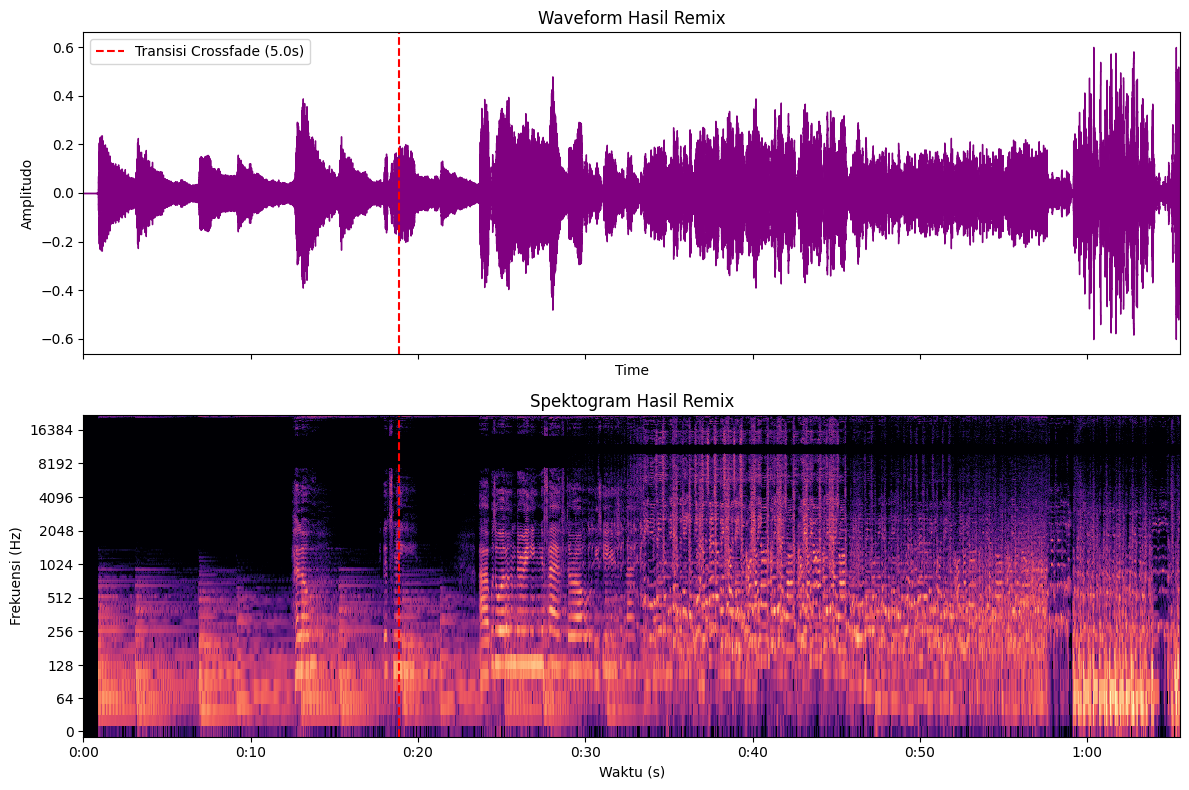

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from pydub import AudioSegment
from pydub.effects import low_pass_filter


# --- Analisis Musik: Deteksi Tempo dan Kunci Nada ---

print("Menganalisis Lagu 1 (Sedih)...")
file_sedih = 'lagu1.wav'
y_sedih, sr_sedih = librosa.load(file_sedih, duration=60)
tempo_sedih, _ = librosa.beat.beat_track(y=y_sedih, sr=sr_sedih)
key_sedih = librosa.feature.chroma_stft(y=y_sedih, sr=sr_sedih)
key_sedih_avg = np.mean(key_sedih, axis=1)
# Konversi ke nama kunci nada (C, C#, D, etc.)
notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
estimated_key_sedih = notes[np.argmax(key_sedih_avg)]
print(f"-> Perkiraan Tempo: {tempo_sedih[0]:.2f} BPM")
print(f"-> Perkiraan Kunci Nada Dominan: {estimated_key_sedih}")


print("\nMenganalisis Lagu 2 (Ceria)...")
file_ceria = 'lagu2.wav'
y_ceria, sr_ceria = librosa.load(file_ceria, duration=60)
tempo_ceria, _ = librosa.beat.beat_track(y=y_ceria, sr=sr_ceria)
key_ceria = librosa.feature.chroma_stft(y=y_ceria, sr=sr_ceria)
key_ceria_avg = np.mean(key_ceria, axis=1)
estimated_key_ceria = notes[np.argmax(key_ceria_avg)]
print(f"-> Perkiraan Tempo: {tempo_ceria[0]:.2f} BPM")
print(f"-> Perkiraan Kunci Nada Dominan: {estimated_key_ceria}")


# --- Proses Remix ---

# Parameter Target: Kita akan menyamakan lagu ceria ke lagu sedih
target_tempo = tempo_sedih[0]
target_key_index = np.argmax(key_sedih_avg)
source_key_index = np.argmax(key_ceria_avg)

print("\nMemulai proses Remix...")

# a. Time Stretch: Menyamakan tempo lagu ceria ke tempo lagu sedih
print(f"-> Time Stretching lagu ceria dari {tempo_ceria[0]:.2f} BPM ke {target_tempo:.2f} BPM...")
rate_stretch = target_tempo / tempo_ceria[0]
y_ceria_stretched = librosa.effects.time_stretch(y_ceria, rate=rate_stretch)

# b. Pitch Shift: Menyamakan kunci nada lagu ceria ke lagu sedih
semitone_shift = target_key_index - source_key_index
# Jika perbedaan lebih dari 6 semitone, lebih baik pitch shift ke arah sebaliknya
if semitone_shift > 6:
    semitone_shift -= 12
elif semitone_shift < -6:
    semitone_shift += 12

print(f"-> Pitch Shifting lagu ceria sebanyak {semitone_shift} semitone...")
y_ceria_processed = librosa.effects.pitch_shift(y_ceria_stretched, sr=sr_ceria, n_steps=semitone_shift)

original_audio_ceria = AudioSegment.from_wav(file_ceria)
sample_width = original_audio_ceria.sample_width
frame_rate = original_audio_ceria.frame_rate

if sample_width == 2:
    y_ceria_processed_int = np.array(y_ceria_processed * (1 << 15), dtype=np.int16)
elif sample_width == 3:
     print("Warning: 24-bit audio detected. Conversion to pydub might not be perfect.")
     y_ceria_processed_int = np.array(y_ceria_processed * (1 << 23), dtype=np.int32)
elif sample_width == 4:
     y_ceria_processed_int = np.array(y_ceria_processed * (1 << 31), dtype=np.int32)
else:
     print(f"Warning: Unsupported sample width {sample_width}. Conversion might fail.")
     y_ceria_processed_int = np.array(y_ceria_processed * (1 << 15), dtype=np.int16)


processed_audio_ceria = AudioSegment(
    y_ceria_processed_int.tobytes(),
    frame_rate=frame_rate,
    sample_width=sample_width,
    channels=1
)


# --- Menggabungkan with Crossfade ---

print("-> Menggabungkan kedua lagu dengan crossfade...")
# Muat audio sedih with pydub
audio_sedih = AudioSegment.from_wav(file_sedih)

# Samakan panjang durasi (ambil yang terpendek)
min_duration = min(len(audio_sedih), len(processed_audio_ceria))
audio_sedih = audio_sedih[:min_duration]
processed_audio_ceria = processed_audio_ceria[:min_duration]


# Tentukan durasi crossfade (misal 5 detik = 5000 ms)
crossfade_duration = 5000

# Terapkan crossfade using append with crossfade argument
remix = audio_sedih.append(processed_audio_ceria, crossfade=crossfade_duration)


# --- Filter Tambahan (Opsional) ---
print("-> Menerapkan filter tambahan (outro)...")
outro_start = len(remix) - 10000
if outro_start < 0:
    outro_start = 0

outro_part = remix[outro_start:]
outro_filtered = low_pass_filter(outro_part, 1000)
# Gabungkan kembali
remix = remix[:outro_start] + outro_filtered


# --- Simpan Hasil Akhir ---
output_file = '/content/drive/MyDrive/multimedia/lagu_remix_final.wav'
remix.export(output_file, format='wav')
print(f"\nProses selesai. File disimpan sebagai '{output_file}'")


# --- Visualisasi Hasil Remix ---

print("Membuat visualisasi hasil remix...")
y_remix = np.array(remix.get_array_of_samples(), dtype=np.float32)
if remix.sample_width == 2: # 16-bit
     y_remix = y_remix / (1 << 15)
elif remix.sample_width == 3:
     y_remix = y_remix / (1 << 23)
elif remix.sample_width == 4:
     y_remix = y_remix / (1 << 31)

sr_remix = remix.frame_rate


fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))

librosa.display.waveshow(y_remix, sr=sr_remix, ax=ax[0], color='purple')
ax[0].set_title('Waveform Hasil Remix')
ax[0].set_ylabel('Amplitudo')
ax[0].axvline(x=min_duration/1000, color='r', linestyle='--', label=f'Transisi Crossfade ({crossfade_duration/1000}s)')
ax[0].legend()


D_remix = librosa.stft(y_remix)
DB_remix = librosa.amplitude_to_db(np.abs(D_remix), ref=np.max)
librosa.display.specshow(DB_remix, sr=sr_remix, x_axis='time', y_axis='log', ax=ax[1])
ax[1].set_title('Spektogram Hasil Remix')
ax[1].set_ylabel('Frekuensi (Hz)')
ax[1].set_xlabel('Waktu (s)')
ax[1].axvline(x=min_duration/1000, color='r', linestyle='--')


fig.tight_layout()
plt.show()

**Referensi**


Sebagian Tugas digenerate di AI, yakni codingan untuk memproses audio

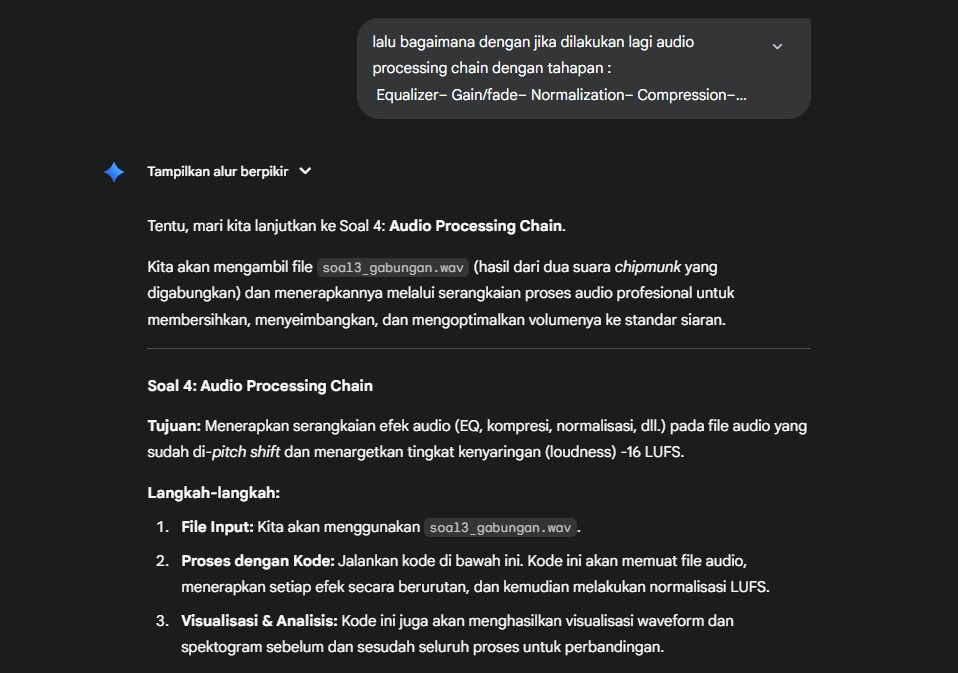

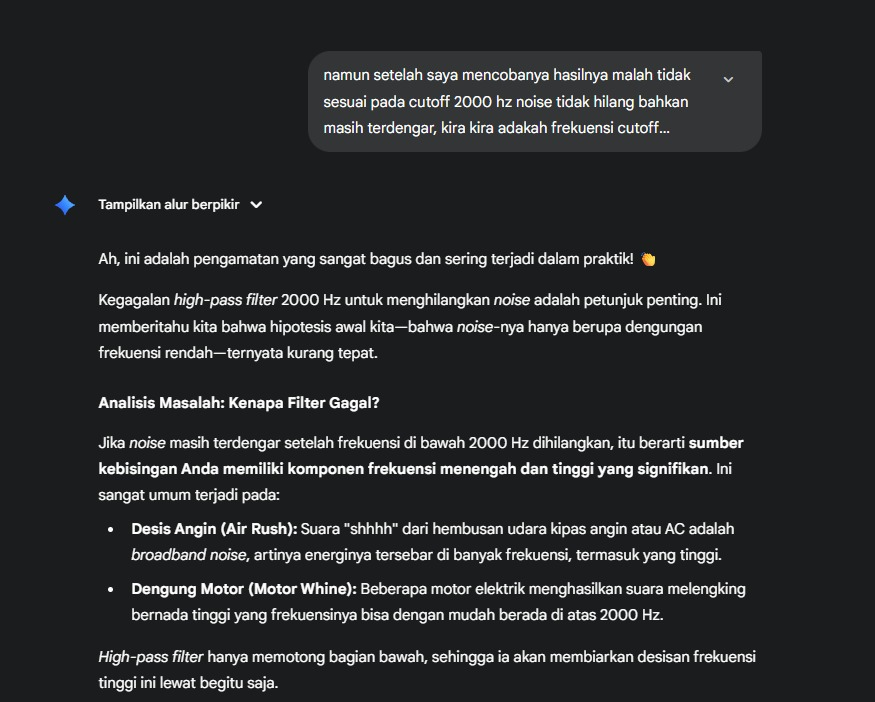

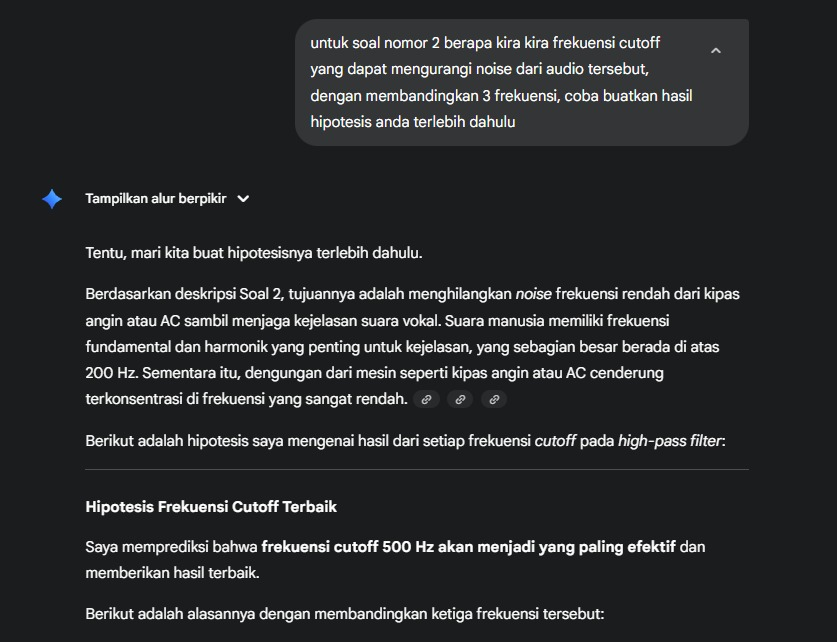